In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#baca file excel

df = pd.read_excel('FinalOnlineRetail.xlsx')


In [7]:
df.head() #melihat 5 baris pertama
df.info() #informasi tipe data dan missing values
df.describe() #statistik deskriptif untuk kolom numberik
df.isnull().sum() #cek jumlah missing value per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399765 entries, 0 to 399764
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    399765 non-null  object        
 1   StockCode    399765 non-null  object        
 2   Description  399765 non-null  object        
 3   Quantity     399765 non-null  int64         
 4   InvoiceDate  399765 non-null  datetime64[ns]
 5   UnitPrice    399765 non-null  int64         
 6   CustomerID   399765 non-null  int64         
 7   Country      399765 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 24.4+ MB


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [8]:
df['CustomerID'] = df['CustomerID'].astype(str)


In [9]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice               int64
CustomerID             object
Country                object
dtype: object


In [10]:
print("Number of transactions:", df['InvoiceNo'].nunique() )
print("Number of Customers:", df['CustomerID'].nunique())

Number of transactions: 21866
Number of Customers: 4362


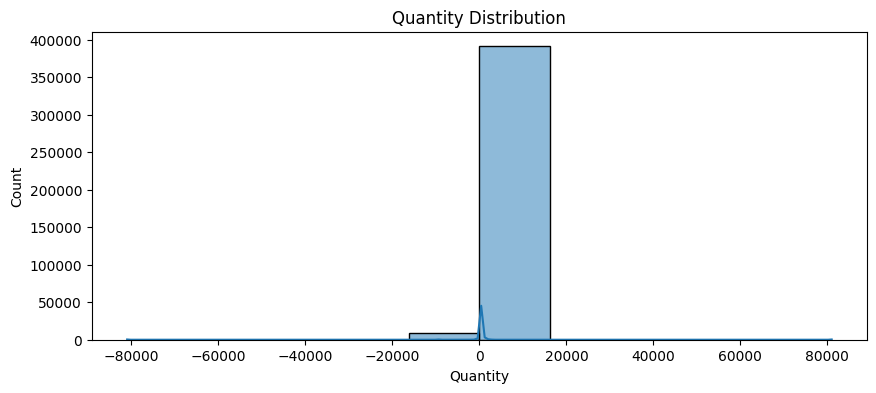

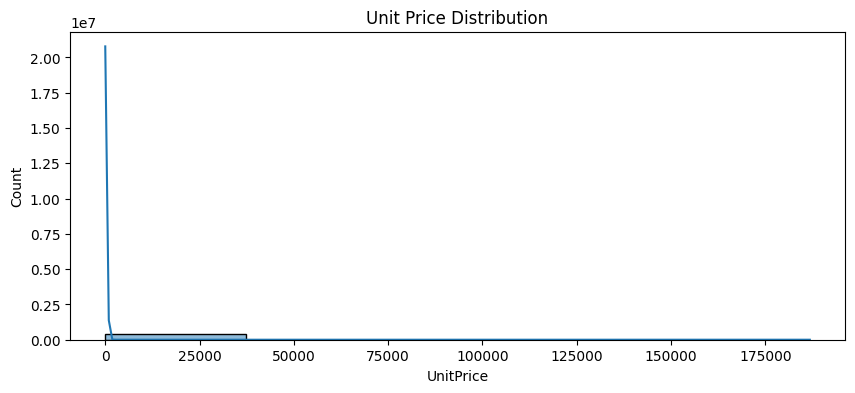

In [ ]:
#plt.figure(figsize=(10,4))
#sns.histplot(df['Quantity'], bins=10,kde=True)
#plt.title('Quantity Distribution')
#plt.show()

#plt.figure(figsize=(10,4))
#sns.histplot(df['UnitPrice'],bins=5, kde=True)
#plt.title('Unit Price Distribution')
#plt.show()

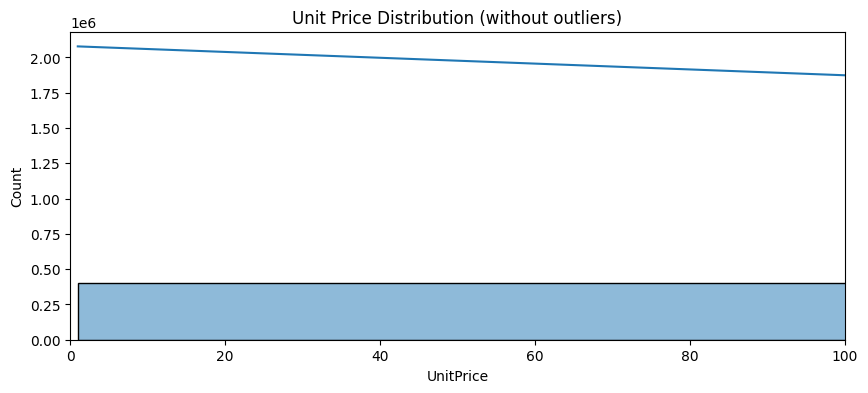

In [ ]:
#plt.figure(figsize=(10,4))
#sns.histplot(df['UnitPrice'], bins=50, kde=True)
#plt.xlim(0,100)
#plt.title('Unit Price Distribution (without outliers)')
#plt.show()

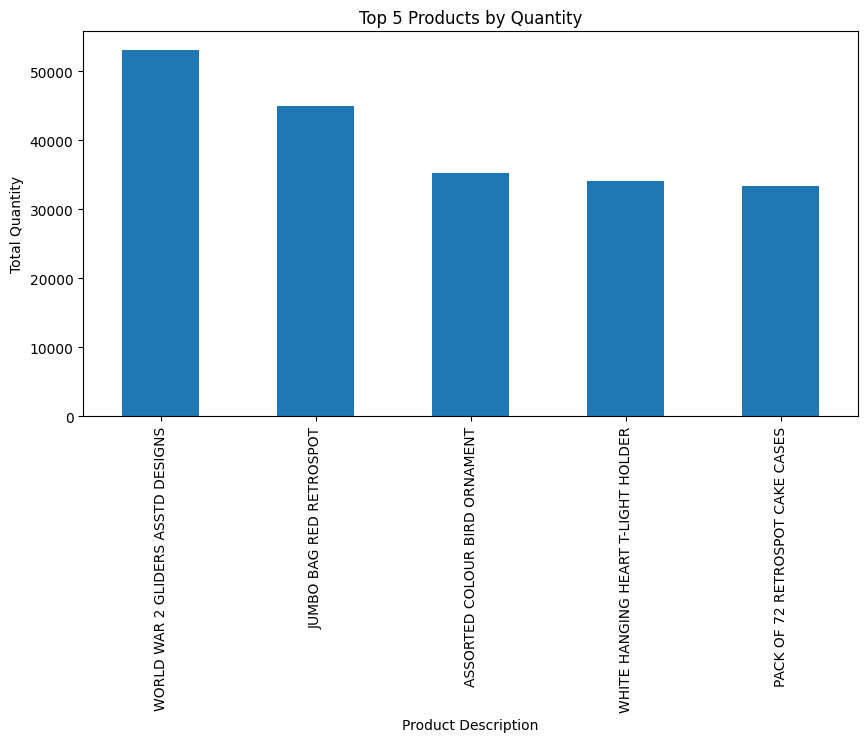

In [ ]:
top_products =df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', figsize=(10,5), title ='Top 5 Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.show()

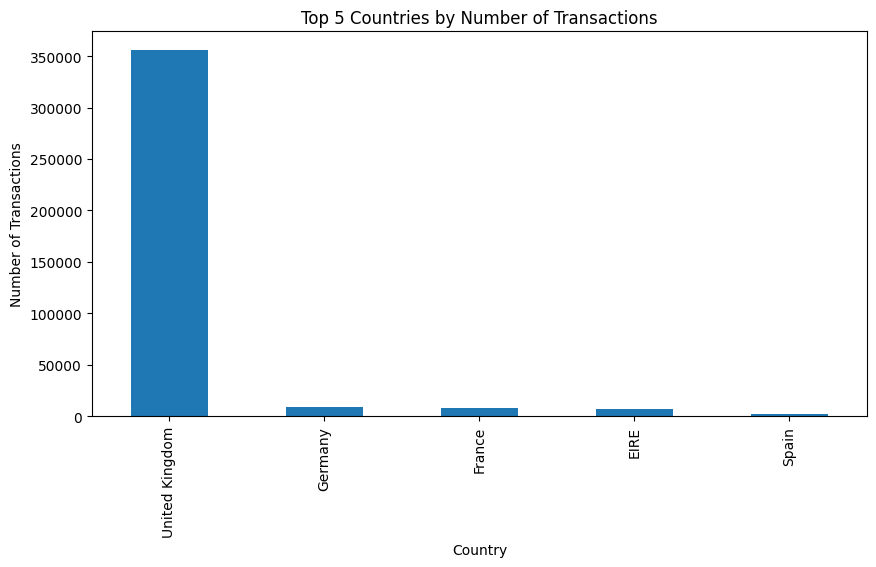

In [ ]:
df['Country'].value_counts().head(5).plot(kind='bar', figsize =(10,5), title='Top 5 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

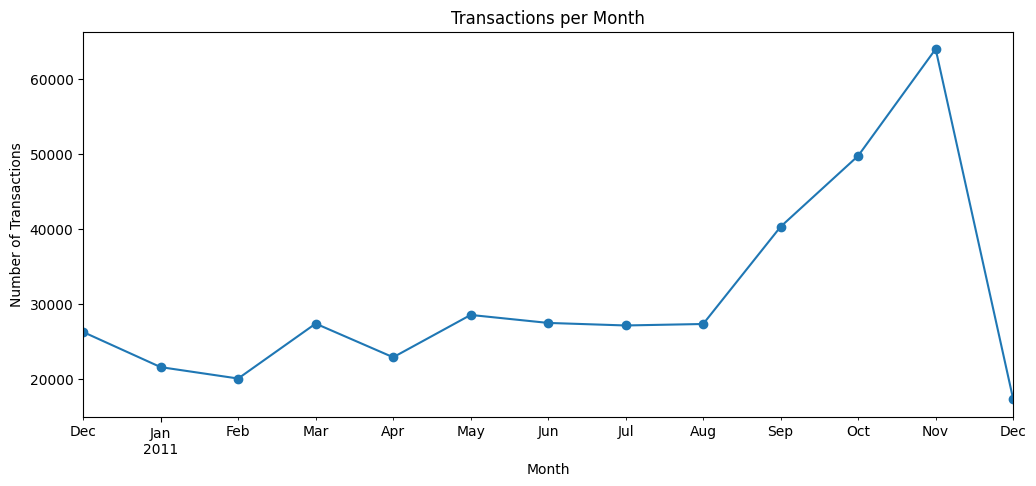

In [ ]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.to_period('M')
monthly_sales= df.groupby('Month').size()

monthly_sales.plot(kind='line',marker='o',figsize=(12,5), title ='Transactions per Month')
plt.ylabel('Number of Transactions')
plt.show()

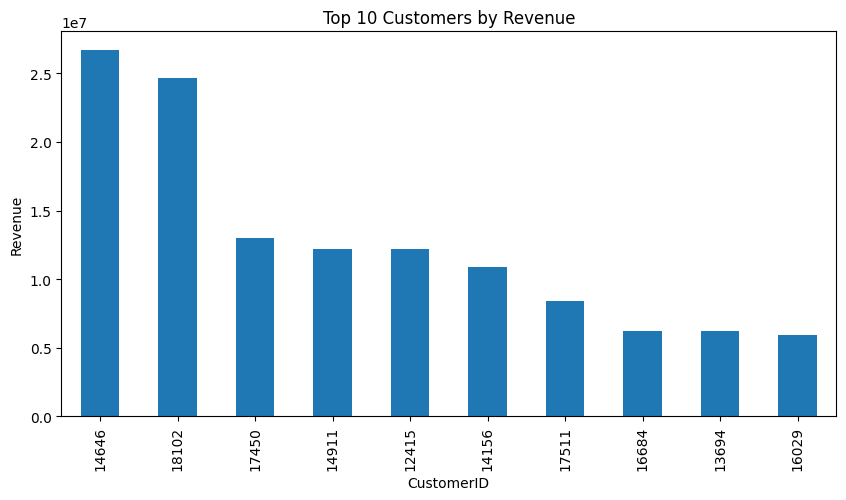

In [ ]:
df['Revenue']=df['Quantity']*df['UnitPrice']
top_customers= df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize =(10,5), title ='Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.show()

In [ ]:
df[(df['Quantity']<0) | (df['UnitPrice'] ==0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Revenue
391166,C536379,D,Discount,-1,2010-12-01 09:41:00,275,14527,United Kingdom,2010-12,-275
391167,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,465,15311,United Kingdom,2010-12,-465
391168,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,345,17548,United Kingdom,2010-12,-4140
391169,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,29,17548,United Kingdom,2010-12,-696
391170,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,29,17548,United Kingdom,2010-12,-696
